# Markov Chain
*过去所有的信息都被保存在了现在的状态下*
$$
P(X_{t+1} \vert \ldots X_{1},X_{t-1},X_{t})=P(X_{t+1} \vert X_{t})
$$

## 转移概率矩阵
事件状态可以转换为**概率矩阵**（**状态分布矩阵**）

例如，若存在A,B两个状态，其中A状态转为A，B两个状态的概率分别为0.3,0.7；B转为A，B两个状态的概率分别为0.1,0.9.
**转移概率矩阵** 
$$
P=\left(
\begin{array}{ccc}
  & A   &   B \\
A & 0.3 & 0.7 \\
B & 0.9 & 0.1 
\end{array}
\right)
$$

两次运动后
$$
\begin{align}
PP=&\left(
\begin{array}{ccc}
  & A   &   B \\
A & 0.3 & 0.7 \\
B & 0.9 & 0.1 
\end{array}
\right)

\left(
\begin{array}{ccc}
  & A   &   B \\
A & 0.3 & 0.7 \\
B & 0.9 & 0.1 
\end{array}
\right)

\\ =&\left(
\begin{array}{ccc}
  & A   &   B \\
A & 0.3*0.3+0.7*0.9 & 0.3*0.7+0.7*0.1 \\
B & 0.9*0.3+0.1*0.9 & 0.9*0.7+0.1*0.1
\end{array}
\right)
\\
=&\left(
\begin{array}{ccc}
  & A    &   B  \\
A & 0.72 & 0.28 \\
B & 0.36 & 0.64
\end{array}
\right)
\end{align}
$$

## 转移状态矩阵具有稳定性
状态转移矩阵有一个非常重要的特性，经过一定有限次数序列的转换，最终一定可以得到一个稳定的概率分布 ，且**与初始状态概率分布无关**。

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# initial matrix
matrix_trans = np.matrix([[0.3,0.7],
                          [0.9,0.1]],dtype=np.float32)
# boundary condition
matrix_epoch = np.matrix([[0.55,0.45],
                          [0.75,0.25]],dtype=np.float32)

# 30 iterations
niter = 30
a2a = np.zeros(niter)
a2b = np.zeros(niter)
b2a = np.zeros(niter)
b2b = np.zeros(niter)


for i in range(niter):
    matrix_epoch = matrix_epoch * matrix_trans
    a2a[i] = matrix_epoch[0,0]
    a2b[i] = matrix_epoch[0,1]
    b2a[i] = matrix_epoch[1,0]
    b2b[i] = matrix_epoch[1,1]
    if i < 5 or i >= niter-3:
        print("Current Epoch:",i+1)
        print(matrix_epoch)


Current Epoch: 1
[[0.57       0.42999998]
 [0.45       0.54999995]]
Current Epoch: 2
[[0.55799997 0.442     ]
 [0.62999994 0.37      ]]
Current Epoch: 3
[[0.5652     0.43479997]
 [0.522      0.47799996]]
Current Epoch: 4
[[0.56087995 0.43912   ]
 [0.5868     0.41320002]]
Current Epoch: 5
[[0.563472   0.43652794]
 [0.54792    0.45207998]]
Current Epoch: 28
[[0.5624998 0.4374999]
 [0.5625    0.4374998]]
Current Epoch: 29
[[0.5624999  0.43749985]
 [0.5624998  0.43749997]]
Current Epoch: 30
[[0.5624998  0.4374999 ]
 [0.56249994 0.43749985]]


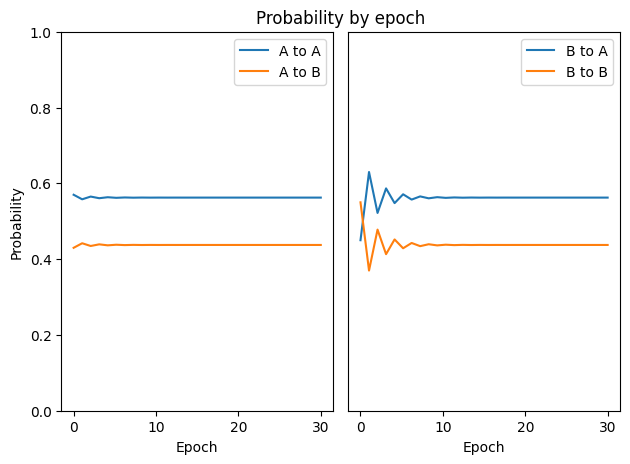

In [50]:
        
fig = plt.figure(facecolor="white")
plt.title("Probability by epoch")
plt.axis('off')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
xline = np.linspace(0,niter,niter)
# curve A -> A
ax1.plot(xline, a2a[:],label="A to A")
# curve A -> B
ax1.plot(xline, a2b[:],label="A to B")
# curve B -> A
ax2.plot(xline, b2a[:],label="B to A")
# curve B -> B
ax2.plot(xline, b2b[:],label="B to B")
ax1.legend(loc="best")
ax2.legend(loc="best")
ax1.set_xlabel("Epoch")
ax2.set_xlabel("Epoch")
ax1.set_ylabel("Probability")
ax2.set_yticks([])
ax1.set_ylim([0,1])
ax2.set_ylim([0,1])
plt.tight_layout()
plt.show()